In [27]:
## Parametric Stats --> distributions/models (it follows underlying dist. thus req less data points)
## Non-parametric stats : 1. Says data is randomly generated 2. Is observation is independent of all other samples
## In Non-parametric stats there should be no bias in picking the items.(req larger amt of data than parametric )

# Bootstrapping :

* Used for Non-parametic Stats
* Non-parametric Stats + Computational-Simulations
* CLT : Sample means are gaussian distributed with mean=population-mean
* <bold color='r'>Ques :</bold> How to estimate the population median(or other statistics) given a single sample (S)?
* Ans : Bootstrapping
* Assumption : Each observed value in the sample (S) is randomly collected and are independent.

In [28]:
# Bootstrapping diagram :

In [7]:
# Synthetically create a sample with random and independent observations

# Let us use a sample of synthetic data (from some disb)
# we generate so that we know the population median to compare agains
# Let sample from Beta disb with alpha=2, beta=2 which has a population median of 0.5
# Refer : https://en.wikipedia.org/wiki/Beta_distribution 
# Median ~ (alpha-1/3)/(alpha+beta-2/3)

import numpy as np
import seaborn as sns

n=100;
S=np.random.beta(2,2,n) # data can have any distribution.

# Q. Given S, how to estimate the population median?


# function to generate a bootstrap(sampling with replacement) sample of size n given a sample S.
def bootstrapSample(S,m):
    ret=np.zeros(m)
    n=S.size;

    indx=np.random.randint(n ,size=m) # generate random integer indices from discrete unif rand
    r=S[indx]
    return r

# when m is slightly greater than n (it gives better results)

m=50; # size of each bootstrap sample
k=1000; # number of bootstrap sample


medians=np.zeros(k)


for i in range(k):
    medians[i]=np.median(bootstrapSample(S,m))

print(medians.size)




1000


In [8]:
# Now estimate median
print(np.mean(medians))  # point estimate

0.49014410389576396


In [39]:
print(np.median(medians)) # point estimate

0.4927710058642454


/tmp/ipykernel_604047/904452749.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(medians)


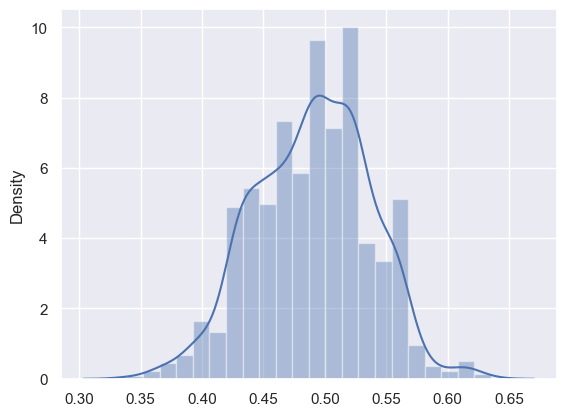

In [10]:
sns.set()
ax=sns.distplot(medians)

In [40]:
# Point estimate : mean, median
# Interval estimate : percentile , disb.

In [45]:
# 95% C.I on the median estimate with n=100 , m=50 ,k=1000
lb_M=np.percentile(medians,2.5)
ub_M=np.percentile(medians,97.5)
mid_M=np.percentile(medians,50)

print(lb_M,mid_M,ub_M) # acc. to 95% C.I the value lies b/w 0.39 to 0.57
# this interval it too wide (making it precise)

0.39713685963765577 0.4927710058642454 0.5710811071898713


In [48]:
# same experiment as above with same S,n=100, m=100,k=1000

n=100
m=100 # size of each bootstrap sample
k=1000 # number of bootstrap samples

medians=np.zeros(k)

for i in range(k):
    medians[i]=np.median(bootstrapSample(S,m))

print(medians.size)

lb_M=np.percentile(medians,2.5)
ub_M=np.percentile(medians,97.5)
mid_M=np.percentile(medians,50)

print(lb_M,mid_M,ub_M)

1000
0.42731957464077014 0.49342953153367664 0.5548881132175362


In [49]:
#### Practice

In [50]:
# calculate 10th percentile for 100 samples: